# Car Model Classification from an Image
This Colab Notebook is part of a dissertation project of a final-year Computer Science student where the aim is to create a Deep Learning model that can successfully classify a car model, given an image. 

The dataset to be used for this task is the Stanford Car Dataset, which contains approximately 16K images of cars split among 196 classes. 

Moreover, the notebook contains multiple sections so that anyone can follow and understand the process of creating and training a Machine Learning model with PyTorch. 

<u>__Kindly Note__</u> that some sections will have the flag __*Required*__ in their title. This flag indicates that the cell(s) in those sections should be executed in order for the following required code to function. Contrary, sections marked __*Optional*__ are not required. The reason being these sections provide demonstrations of their respective concept (i.e., visualizing data). 

---
### __Outline:__ 
 - Imports
 - Setting up device agnostic code 
 - Data preperation 
    - Downloading the Dataset
    - Visualizing the data
    - Creating data-related functions (Dataset -> DataLoader)

    
 - Viewing what's inside the DataLoader
 - Create function to time experiments
 - Create model training/testing methods
 - Model architecture selections
 - Plot model resutls
 - Make predictions /w model
 - Saving/Loading your model in PyTorch

In [1]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import models

# Import DataLoader
from torch.utils.data import DataLoader

# Import torchinfo.summary to be able to view a summary of our model
from torchinfo import summary 

# Import numpy for tensor convertions
import numpy as np

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Import tqdm (Creates a progress bar for our iterations)
from tqdm.auto import tqdm

# Import timeit to keep track of time
from timeit import default_timer as timer

# Import typing
from typing import List, Tuple, Dict

# Import pathlib to create paths
from pathlib import Path

## Setup device agnostic code (REQUIRED)

In [ ]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
print(torch.cuda.get_device_name(device)) 

## Data preparation

* Create data transforms
* Download and store train and test data
* Create a Python iterable over our dataset (Using DataLoader class)

### Download Dataset (REQUIRED)

#### __1<sup>st</sup> method:__ Download Dataset from `torchvision.datasets`
By using this method you are able to download the Stanford Cars Dataset via PyTorch's `torchvision.datasets` module. This is the recommended method since it is easier than manually downloading the dataset.

__Note (!)__ Use this method if you have already downloaded the dataset from the original [source](https://ai.stanford.edu/~jkrause/cars/car_dataset.html)

In [2]:
# Prepare the transforms we will apply to the images
demo_train_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

demo_test_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [3]:
# Download and store our training and testing data

demo_train_data = datasets.StanfordCars(
    root="car_model_data",
    split="train", # do we want the training dataset?
    download=True, # do we want to download it?
    transform=demo_train_data_transforms, # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

demo_test_data = datasets.StanfordCars(
    root="car_model_data",
    split="test", # do we want the training dataset?
    download=True, # do we want to download it?
    transform=demo_test_data_transforms, # how do we want to transform the data?
    target_transform=None # how do we want to transform the labels/targets?
)

#### __2<sup>nd</sup> method:__ Download Dataset from **[Kaggle](https://www.kaggle.com/datasets/jutrera/stanford-car-dataset-by-classes-folder)**
While not the recommended method, you may also download the Stanford Cars Dataset via __Kaggle__.

Why should you choose this method?
> During development of this project (4/2023), I noticed that the __first method__ did not function correctly and produces a __404__ error message. In addition, since the original Stanford Cars Dataset [site](https://ai.stanford.edu/~jkrause/cars/car_dataset.html) also threw the same error, I supposed that the problem was most likely caused by the dataset's original source.

What do you need to use this method?
- The __only__ thing required to use this method is to have a __Kaggle API Token__, which is obtained by creating a Kaggle account. 
- To generate your token, Login to __Kaggle__ -> __Settings__ -> __Create new token__ (You might need to select __Expire Token__ beforehand if you have created a token before)

__Steps__
1. Install the Kaggle API client 
    > E.g., `pip install kaggle`
2. Authenticate yourself using the kaggle token you generated
    > For UNIX-based OS:
    The client will look at `~/.kaggle/kaggle.json`, to find your token
    
    > For Windows OS:
    The client will look at `C:\Users<UserA>\.kaggle.json`
    For more info look the official [documentation](https://www.kaggle.com/docs/api)

    Then, give permission to the API client to use the token
    > For UNIX-based OS: `chmod 600 /root/.kaggle/kaggle.json`
    

3. Download Stanford Cars Dataset
    > `kaggle datasets download -d jutrera/stanford-car-dataset-by-classes-folder`

    Then, unzip the downloaded folder
    > `unzip stanford-car-dataset-by-classes-folder.zip`


In [ ]:
# Set your directory paths
data_dir = './car_data/car_data'
train_dir = data_dir + '/train'
test_dir = data_dir + '/test'

In [ ]:
# Prepare the transforms we will apply to the images (Demo transformations)
demo_train_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

demo_test_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load the datasets with ImageFolder
demo_train_data = datasets.ImageFolder(train_dir, transform=demo_train_data_transforms)
demo_test_data = datasets.ImageFolder(test_dir, transform=demo_test_data_transforms)

### Visualizing our data (OPTIONAL)
 * To visualize the data in the dataset, download Stanford Cars Dataset using one of the above methods

In [4]:
# Check the lengths of our Dataset

print(f"Training dataset consists of {len(demo_train_data)} images.\nTresting dataset consists of {len(demo_test_data)} images.")

Training dataset consists of 8144 images.
Tresting dataset consists of 8041 images.


In [ ]:
# Get the first image and label from the train dataset

image, label = demo_train_data[0]
image, label

In [9]:
# Check the total number of classes for our dataset (196 different car models)

class_names = demo_train_data.classes
len(class_names)

196

In [5]:
# View the classes and their corresponding idx

class_to_idx = demo_train_data.class_to_idx
class_to_idx

{'AM General Hummer SUV 2000': 0,
 'Acura RL Sedan 2012': 1,
 'Acura TL Sedan 2012': 2,
 'Acura TL Type-S 2008': 3,
 'Acura TSX Sedan 2012': 4,
 'Acura Integra Type R 2001': 5,
 'Acura ZDX Hatchback 2012': 6,
 'Aston Martin V8 Vantage Convertible 2012': 7,
 'Aston Martin V8 Vantage Coupe 2012': 8,
 'Aston Martin Virage Convertible 2012': 9,
 'Aston Martin Virage Coupe 2012': 10,
 'Audi RS 4 Convertible 2008': 11,
 'Audi A5 Coupe 2012': 12,
 'Audi TTS Coupe 2012': 13,
 'Audi R8 Coupe 2012': 14,
 'Audi V8 Sedan 1994': 15,
 'Audi 100 Sedan 1994': 16,
 'Audi 100 Wagon 1994': 17,
 'Audi TT Hatchback 2011': 18,
 'Audi S6 Sedan 2011': 19,
 'Audi S5 Convertible 2012': 20,
 'Audi S5 Coupe 2012': 21,
 'Audi S4 Sedan 2012': 22,
 'Audi S4 Sedan 2007': 23,
 'Audi TT RS Coupe 2012': 24,
 'BMW ActiveHybrid 5 Sedan 2012': 25,
 'BMW 1 Series Convertible 2012': 26,
 'BMW 1 Series Coupe 2012': 27,
 'BMW 3 Series Sedan 2012': 28,
 'BMW 3 Series Wagon 2012': 29,
 'BMW 6 Series Convertible 2007': 30,
 'BMW 

In [115]:
# Check the shape of our image

print(f"Image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image label: Audi TTS Coupe 2012


In [8]:
# Permute image to put color channels last

permuted_img = torch.permute(image, (1,2,0))
print(f"Permuted image shape: {permuted_img.shape}")

Permuted image shape: torch.Size([224, 224, 3])


(-0.5, 223.5, 223.5, -0.5)

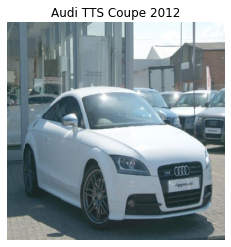

In [117]:
# Show image
plt.imshow(permuted_img) 
plt.title(class_names[label])
plt.axis(False)

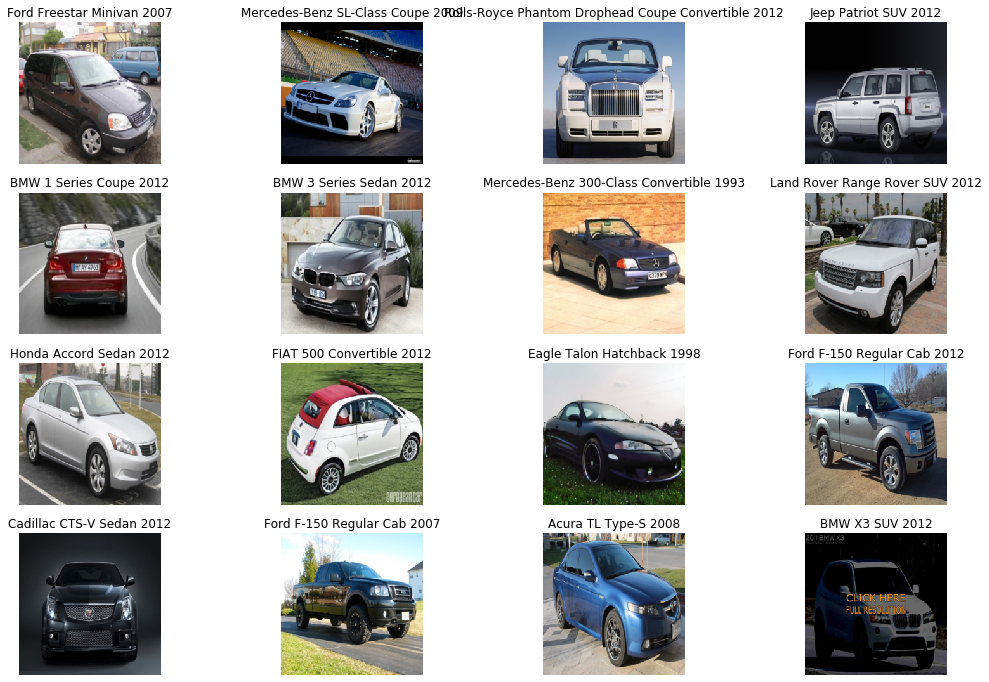

In [10]:
# Show more images
fig = plt.figure(figsize=(18,12))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(demo_train_data), size=[1]).item()
  img, label = demo_train_data[random_idx]
  img = torch.permute(img, (1,2,0))
  fig.add_subplot(rows, cols, i)
  plt.imshow(img, cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

### Creating a function to turn our dataset into a Python Iterable using DataLoader class. (REQUIRED)
More specifically, we want to turn our data into batches (or mini-batches).

__Why would we do this?__

1.It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).

2.It gives our Neural Network more chances to updates its gradients per epoch.

__Create function to remove model year from image labels (Optional)__

In [3]:
def remove_model_year(data: torchvision.datasets):
  
  """Removes model year from Stanford Cars dataset image labels """

  for i in range(len(data.classes)):
    model_class = data.classes[i]
    model_year = model_class.split(" ").pop()
    new_model_class = model_class.replace(model_year, "").strip()
    data.classes[i] = new_model_class

In [10]:
# Init data Hyperparameters

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Setup the num workers hyperparameter (how many subprocesses to use for data loading)
NUM_WORKERS = 2

# Setup the ROOT path for your dataset (This is extremely important if you have downloaded the dataset through Kaggle)
# CHANGE IF REQUIRED
ROOT_PATH = './car_model_data'

__Create method for downloading the dataset (Required)__ 

In [ ]:
def download_dataset_pytorch_version(
    transform: transforms.Compose, 
    test_data_transform: transforms.Compose=None
  ):

  # If second transform is provided then apply two different data transforms else
  # both dataset get the same one.
  if test_data_transform is not None:
    # Download and store the training and testing data using different transforms
    train_data = datasets.StanfordCars(
        root="car_model_data", # Specifies the target root of the dataset
        split="train", # Choses the training dataset
        download=True, # Downloads the chosen dataset
        transform=transform, # Applies transformation to the data
        target_transform=None # Applies transformation to the classes/labels
    ) 

    test_data = datasets.StanfordCars(
        root="car_model_data",
        split="test", 
        download=True, 
        transform=test_data_transform, 
        target_transform=None 
    )
  else:
    train_data = datasets.StanfordCars(
        root="car_model_data",
        split="train",
        download=True, 
        transform=transform,
        target_transform=None 
    ) 

    test_data = datasets.StanfordCars(
        root="car_model_data",
        split="test", 
        download=True, 
        transform=transform, 
        target_transform=None 
    )

  return train_data, test_data

In [ ]:
def download_dataset_kaggle_version(
    transform: transforms.Compose, 
    test_data_transform: transforms.Compose=None
  )  -> Tuple[torchvision.datasets.folder.ImageFolder, torchvision.datasets.folder.ImageFolder]:

  # Set directory paths
  data_dir = './car_data/car_data'
  train_dir = data_dir + '/train'
  test_dir = data_dir + '/test'

  # If second transform is provided then apply two different data transforms else
  # both dataset get the same one.
  if test_data_transform is not None:
    # Download and store the training and testing data using different transforms
    train_data = datasets.ImageFolder(train_dir, transform=transform)

    test_data = datasets.ImageFolder(test_dir, transform=test_data_transform)

  else:
    train_data = datasets.ImageFolder(train_dir, transform=transform)

    test_data = datasets.ImageFolder(test_dir, transform=transform)

  return train_data, test_data

In [11]:
def create_dataloaders(
    transform: transforms.Compose, 
    test_data_transform: transforms.Compose=None,
    batch_size: int=BATCH_SIZE, 
    num_workers: int=NUM_WORKERS
) -> Tuple[DataLoader, DataLoader, List]:
  
  """Creates training and testing DataLoaders.
  Takes in a desirable transform and applies it to Stanford Cars dataset
  and turns it into a DataLoader. If a second transform is provided, the first
  applies to the training dataset and the second to the testing dataset.
  Args:
    transform: torchvision transforms to perform on training and testing data else second transform is given.
    test_data_transform: Default value is None else a different transform is applied to the testing dataset
    batch_size: Number of samples per batch in each of the DataLoaders.
    num_workers: An integer for number of workers per DataLoader.
  Returns:
    A tuple of (train_dataloader, test_dataloader, class_names).
    Where class_names is a list of the target classes.
    Example usage (for general use):
      train_dataloader, test_dataloader, class_names = create_dataloaders(transform=some_transform,
                                                                          batch_size=32,
                                                                          num_workers=2)
  """
  # Tries to download data the Default (PyTorch method). If does not succeed, downloads it using the kaggle method
  print("Trying to download dataset using default PyTorch method...")
  try:
    train_data, test_data = download_dataset_pytorch_version(transform, test_data_transform)
  except:
    print("Default method failed. Re-trying download using Kaggle version. You need to have downloaded the Kaggle dataset as described in 'Download Dataset Section'.")
    train_data, test_data = download_dataset_kaggle_version(transform, test_data_transform)
  
  print("Dataset successfully downloaded.")

  # Removes model year from dataset (Optional)
  # remove_model_year(train_data)
  # remove_model_year(test_data)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      dataset=train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True, # Allows for higher bandwidth when changing the target device for our data (from CPU to GPU)
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )
  
  return train_dataloader, test_dataloader, class_names

## Run create_dataloaders() and see what's inside our Dataloaders (OPTIONAL)

In [12]:
# Create dataloaders
demo_train_dataloader, demo_test_dataloader, class_names = create_dataloaders(demo_train_data_transforms, demo_test_data_transforms)

In [10]:
# View information about the dataloaders
print(f"DataLoaders: {demo_train_dataloader, demo_test_dataloader}")
print(f"Lenght of train_dataloader: {len(demo_train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Lenght of test_dataloader: {len(demo_test_dataloader)} batches of {BATCH_SIZE} ...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x00000185786FD508>, <torch.utils.data.dataloader.DataLoader object at 0x0000018578305E08>)
Lenght of train_dataloader: 255 batches of 32...
Lenght of test_dataloader: 252 batches of 32 ...


In [11]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(demo_train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

Image size: torch.Size([224, 224, 3])
Label: 194, label size: torch.Size([])


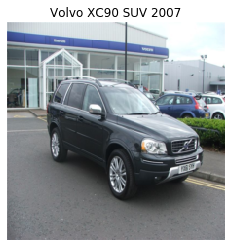

In [14]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
img = torch.permute(img, (1,2,0))
plt.imshow(img)
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## Create function to time experiments (REQUIRED)

In [15]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  
  """Prints difference between start and end time."""

  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

## Create model training/testing functions (REQUIRED)




In [16]:
def accuracy_fn_with_topk(y_true, y_pred, top_k=(1,)):
    """Calculates TopK accuracy between truth labels and prediction for the specified values of K for a specific Batch

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.
        top_k (tuple): TopK accuracy to calculate. E.g., tok_k = (1,5) calculates top1 and top5 accuracies

    Returns:
        list_topk_accs: Contains accuracies for each top K. (E.g, for top_k=(1,5): [46.875, 71.875], where pos 0 is top1 acc and pos 1 top5 acc)
    """

    max_k = max(top_k)  # max number of labels we will consider as correct output

    batch_size = y_true.size(0) # batch size (Denoted as B in later comments)

    # Getting the top K indices from the output (Notice that .topk() returns a tuple of the actual values and indices, in this case
    # we only care about the indices)
    _, y_pred = y_pred.topk(k=max_k, dim=1)  # _, [B, number_classes] -> [B, max_k]
    y_pred = y_pred.t()  # [B, max_k] -> [max_k, B] Expects input to be <= 2-D tensor and transposes dimensions 0 and 1.

    # We reshape the target (truth labels) of this batch in order to check wether any of our model's Kth prediction
    # matches an actual label
    target_reshaped = y_true.view(1, -1).expand_as(y_pred)  # [B] -> [B, 1] -> [max_k, B]
    
    # Here we check if any of our model's top-K predictions exist within the truth labels of the batch
    # If yes, it is assigned with 1 (True), else 0 (False)
    correct = (y_pred == target_reshaped)  # [max_k, B] were for each example we know which topk prediction matched truth
    
    list_topk_accs = []
    for k in top_k:
      # Tensor containing correct answers for each top K
      tensor_which_topk_matched_truth = correct[:k]  # [maxk, B] -> [K, B]
      
      # Flatten tensor
      flattened_tensor_which_topk_matched_truth = tensor_which_topk_matched_truth.reshape(-1).float()  # [k, B] -> [kB]
      
      # Check if we got it right for any of our top K prediction for each example in batch
      correct_topk = flattened_tensor_which_topk_matched_truth.float().sum(dim=0, keepdim=True)  # [kB] -> [1]
      
      # Calculate topK accuracy and add it to list
      topk_acc = (correct_topk / batch_size).item() * 100   # topK accuracy for this batch
      list_topk_accs.append(topk_acc)

    return list_topk_accs

In [17]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               scheduler: torch.optim.lr_scheduler = None,
               topk_accuracy: tuple = (1,),
               device: torch.device = device):

  """ Performs a training step with model trying to learn on data_loader."""

  train_loss = 0
  topk_results = [0] * len(topk_accuracy)

  # Put model into training mode
  model.train()

  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):
    # Put data on target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate and accumulate (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5 Optimizer step
    optimizer.step()

    # Calculate TopK accuracies
    temp_topk = accuracy_fn_with_topk(y_true=y, y_pred=y_pred, top_k=topk_accuracy)
    
    # Accumulate accuracies
    for idx in range(len(temp_topk)):
      topk_results[idx] += temp_topk[idx]
    
    # Apply scheduler if one exists
    if scheduler is not None:
      scheduler.step()

  # Divide total train loss and acc by length of train dataloader
  train_loss /= len(data_loader)
  
  print_accuracies = {}
  for idx, val in enumerate(topk_accuracy):
    topk_results[idx] /= len(data_loader)
    print_accuracies["top"+str(val)+"_acc"] = round(topk_results[idx], 2)

  print(f"Train loss: {train_loss:.5f} | Train accuracies: {print_accuracies}")
  
  # Return both lists for tracking
  return train_loss, topk_results

In [18]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               topk_accuracy: tuple = (1,),
               device: torch.device = device):
  
  """ Performs a testing loop step on model going over data_loader."""

  test_loss = 0
  topk_results = [0] * len(topk_accuracy)

  # Put the model in eval mode
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      # Put data on target device
      X, y = X.to(device), y.to(device)   

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate the loss (accumulatively)
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate TopK accuracies
      temp_topk = accuracy_fn_with_topk(y_true=y, y_pred=test_pred, top_k=topk_accuracy)
      
      # Accumulate accuracies
      for idx in range(len(temp_topk)):
        topk_results[idx] += temp_topk[idx]

    # Calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test acc average per batch, per topK acc
    print_accuracies = {}
    for idx, val in enumerate(topk_accuracy):
      topk_results[idx] /= len(data_loader)
      print_accuracies["top"+str(val)+"_acc"] = round(topk_results[idx], 2)

    print(f"Test loss: {test_loss:.5f} | Test accuracies: {print_accuracies}")

    return test_loss, topk_results

### Completed training function (REQUIRED)

In [21]:
def train_model(model: torch.nn.Module,
                train_dataloader: torch.utils.data.DataLoader, 
                test_dataloader: torch.utils.data.DataLoader, 
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                scheduler: torch.optim.lr_scheduler = None,
                epochs:int = 20,
                topk_accuracies: tuple = (1,),
                device: torch.device = device) -> Tuple[torch.nn.Module, Dict]:
  
  """
  Used to train and test a specific model by providing both train/test dataloaders, a loss function,
  an optimizer, a number of epochs to be trained (optional), a topk accuracy (optional), and a device.
  Works by applying a train step and then test step to given model. Measured statistics: Time of training/testing,
  train/test loss and accuracy (top1 by default unless other is specified), no. of epochs and device the model was trained on.
  Args:
    model: A Pytorch model which inherits the torch.nn.Module class.
    train_dataloader, test_dataloader: DataLoaders which the model will be trained and tested on.
    loss_fn: The criterion (loss function) used to measure correctness of model.
    optimizer: The optimizer that will be used during training.
    scheduler: The learning rate sheduler to be used during training.
    topk_accuracy: Tuple that denotes the topK accuracy we want to measure. By default only top1 acc is measured.
    epochs: Number of epochs the model will be trained on. By DEFAULT is 20.
    device: Target device for the model and training/testing phase. By DEFAULT is the one already specified by the device agnostic code.
  Returns:
    A tuple of (nn.Module object, Dictionary).
    Note: learning_rate_values should only be implemented for learning rate schedulers that support get_last_lr() method!
    Where the last four are lists containing measured values throughout training. The lenght of each list should be 
    equal to the number of epochs the model was trained on.
    Example usage:
      model, results = train_model( model=a_model, 
                                    train_dataloader=train_dataloader,
                                    test_dataloader=test_dataloader,
                                    loss_fn=some_loss_function, 
                                    optimizer=some_optimizer,
                                    epochs=any_number_of_epochs,
                                    device=a_device_supported_by_pytorch)
  """                         
  
  # Start timer
  train_time_start_model = timer()

  # Dictionary containing results of training phase 
  results = {
    "epochs" : epochs,
    "train_loss_values" : [],
    "train_acc_values" : {},
    "test_loss_values" : [],
    "test_acc_values" : {},
    "learning_rate_values" : []
  }

  # Nesting dictionaries for various TopK accuracies
  for idx, val in enumerate(topk_accuracies):
      results["train_acc_values"]["top"+str(val)+"_acc"] = []
      results["test_acc_values"]["top"+str(val)+"_acc"] = []

  model.to(device)
  # Train and test model
  for epoch in tqdm(range(epochs)):

    print(f"Epoch: {epoch}\n------------")
    train_loss, train_topk = train_step(model=model,
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              scheduler=None,
              topk_accuracy=topk_accuracies,
              device=device)
    
    test_loss, test_topk = test_step(model=model,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              topk_accuracy=topk_accuracies,
              device=device)

    # Storing loss values for visualization of training/testing phase
    results["train_loss_values"].append(train_loss)
    results["test_loss_values"].append(test_loss)

    # Storing accuracy values
    for idx, val in enumerate(topk_accuracies):
      results["train_acc_values"]["top"+str(val)+"_acc"].append(train_topk[idx])
      results["test_acc_values"]["top"+str(val)+"_acc"].append(test_topk[idx])

    if scheduler is not None:
      scheduler.step(test_loss) # Applicable for learning rate optimizers that require a metric to keep track of (E.g., ReduceLROnPlateau)
      
      # Add the changing learning rate per epoch (Only for schedulers that have get_last_lr() method)
      # results["learning_rate_values"].append(scheduler.get_last_lr())

  # End timer
  train_time_end_model = timer()

  total_train_time_model = print_train_time(start=train_time_start_model, end=train_time_end_model, device=device)

  return model, results

# Model 0: Baseline CNN Model (using TinyVGG architecture from [CNN Explainer](https://poloclub.github.io/cnn-explainer/)

In [ ]:
# Define the baseline CNN model to be used for the first experiment
class BaselineModelTinyVGG(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.

  """
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    # Define proportion (probability) or neurons to dropout
    # self.dropout = nn.Dropout(0.25)

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), 
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*56*56,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # Applying dropout
    # x = self.dropout(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [ ]:
model_0 = BaselineModelTinyVGG(input_shape=3,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

## Setup image transforms and create dataloaders

In [ ]:
# Prepare the transforms we will apply to the images
train_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

test_data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [ ]:
# Create dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(train_data_transforms, test_data_transforms)

## Setup Loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            weight_decay = 0.1,
                            lr=0.01)

## Training and Testing Baseline Model

In [ ]:
model_0, results = train_model(model_0, train_dataloader, test_dataloader, loss_fn, optimizer)

# Model 1: Transfer Learning with ResNet34 Architecture

In [24]:
# Create a ResNet34 model using Pre-trained weights

model_1 = models.resnet34(weights=models.ResNet34_Weights.DEFAULT).to(device)

## Setup image transforms and create dataloaders

In [14]:
# Getting the data transforms used for the pretrained model weights
auto_transforms = models.ResNet34_Weights.DEFAULT.transforms()

# Check auto-transforms
auto_transforms

In [25]:
train_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Create dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(train_transforms, test_transforms)

train_dataloader, test_dataloader

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

input_size = tuple(train_features_batch.size())

# View a summary of the model
summary(model=model_1, 
        input_size=input_size, # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

## Modify Model architecture to fit project needs

1. Freeze all the layers in the `features` layer block. (Since the model is pretrained we do not need to train it again to extract features)
2. Change the `classifier` of the model. (Since the model was trained on the Imagenet-1k dataset, it can classify 1k different classes whereas our project consists of 196 classes only)

In [ ]:
# Freeze all feature extractor layers but not classifier by setting requires_grad=False
for param in model_1.parameters():
    param.requires_grad = False

In [ ]:
# Get the default input for the last layer
ly_in_features = model_1.fc.in_features

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and send it to the target device
model_1.fc = torch.nn.Linear(in_features=ly_in_features, 
                    out_features=output_shape) # same number of output units as our number of classes
model_1.to(device)

In [ ]:
# View a summary of the model after classifier modification
summary(model=model_1, 
        input_size=input_size, # make sure this is "input_size", not "input_shape"
        # col_names=["input_size"], # uncomment for smaller output
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

## Setup Loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)

# Learning rate scheduler (Reduces Learning rate based on accuracy metric)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

## Training and testing model 1

In [ ]:
model_1, results = train_model(model=model_1,
                              train_dataloader=train_dataloader,
                              test_dataloader=test_dataloader,
                              loss_fn=loss_fn, 
                              optimizer=optimizer,
                              scheduler=scheduler,
                              topk_accuracies=(1,5),
                              epochs=10)

# Model 2: Transfer Learning with ResNet50 Architecture

In [11]:
# Create a ResNet50 model using Pre-trained weights

model_2 = models.resnet50(weights=models.ResNet50_Weights.DEFAULT).to(device)

## Setup image transforms and create dataloaders

In [ ]:
# Getting the data transforms used for the pretrained model weights
auto_transforms = models.ResNet50_Weights.DEFAULT.transforms()
auto_transforms

In [21]:
train_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Create dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(auto_transforms)

train_dataloader, test_dataloader

## Modify Model architecture to fit project needs

1. Freeze all the layers in the `features` layer block. (Since the model is pretrained we do not need to train it again to extract features)
2. Change the `classifier` of the model. (Since the model was trained on the Imagenet-1k dataset, it can classify 1k different classes whereas our project consists of 196 classes only)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

input_size = tuple(train_features_batch.size())

# View a summary of the model selected
summary(model=model_2, 
        input_size=input_size,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

In [79]:
# Freeze all layers but not classifier by setting requires_grad=False
for param in model_2.parameters():
    param.requires_grad = False

In [83]:
# Get the default input for the last layer
ly_in_features = model_2.fc.in_features

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_2.fc = torch.nn.Linear(in_features=ly_in_features, out_features=output_shape).to(device)

In [ ]:
# View model summary after modification
summary(model=model_2, 
        input_size=input_size,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

## Setup Loss function and optimizer

In [70]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01, momentum=0.9)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)
# scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer=optimizer,
#                                                 max_lr=0.01,
#                                                 steps_per_epoch=len(train_dataloader),
#                                                 epochs=10)

## Training and testing Model 2

In [ ]:
model_2, results = train_model(model=model_2,
                                    train_dataloader=train_dataloader,
                                    test_dataloader=test_dataloader,
                                    loss_fn=loss_fn, 
                                    optimizer=optimizer,
                                    scheduler=scheduler,
                                    topk_accuracies=(1,5),
                                    epochs=10)

# Model 3: Transfer learning using GoogLeNet architecture

In [ ]:
# Create a GoooLeNet model using Pre-trained weights

model_3 = models.googlenet(weights=models.GoogLeNet_Weights.IMAGENET1K_V1).to(device)

## Setup image transforms and create dataloaders

In [ ]:
auto_transforms = models.GoogLeNet_Weights.IMAGENET1K_V1.transforms()

In [ ]:
train_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Create dataloaders
train_dataloader, test_dataloader, class_names = create_dataloaders(train_transforms, test_transforms)

train_dataloader, test_dataloader

## Modify Model architecture to fit project needs

1. Freeze all the layers in the `features` layer block. (Since the model is pretrained we do not need to train it again to extract features)
2. Change the `classifier` of the model. (Since the model was trained on the Imagenet-1k dataset, it can classify 1k different classes whereas our project consists of 196 classes only)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

input_size = tuple(train_features_batch.size())

# View a summary of the model selected
summary(model=model_3, 
        input_size=input_size,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

In [ ]:
# Get the default input for the last layer
ly_in_features = model_3.fc.in_features

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model_3.fc = torch.nn.Linear(in_features=ly_in_features, out_features=output_shape).to(device)

In [ ]:
# View a summary of the model after change
summary(model=model_3, 
        input_size=input_size,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
) 

## Setup Loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", patience=3, threshold=0.9)

## Training model 3

In [ ]:
model_3, results = train_model(model=model_3,
                                    train_dataloader=train_dataloader,
                                    test_dataloader=test_dataloader,
                                    loss_fn=loss_fn, 
                                    optimizer=optimizer,
                                    scheduler=scheduler,
                                    topk_accuracies=(1,5),
                                    epochs=10)

# Plot training and testing losses/accuracies

In [ ]:
# Print results
results

In [ ]:
# Check the number of each list in the Results dictionary
results["epochs"], len(results["train_loss_values"]), len(results["train_acc_values"]), len(results["test_loss_values"]), len(results["test_acc_values"]), len(results["learning_rate_values"])

In [ ]:
# Create a List containing epochs (E.g., [1,2,3,4,5,6,...])
epochs = [e for e in range(results["epochs"])]

plt.figure(figsize=(26, 4))
nrows = 1
ncols = 4

# Plot the loss curves
plt.subplot(nrows, ncols, 1)
plt.plot(epochs, np.array(torch.tensor(results["train_loss_values"]).numpy()), label="Train loss")
plt.plot(epochs,  np.array(torch.tensor(results["test_loss_values"]).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.xlabel("Epochs")
plt.legend()

# Plot the Top1 accuracy curves for both training/testing phase
plt.subplot(nrows, ncols, 2)
plt.plot(epochs, results["train_acc_values"]["top1_acc"], label="Train accuracy")
plt.plot(epochs, results["test_acc_values"]["top1_acc"], label="Test accuracy")
plt.title("Training and test accuracy (%) curves")
plt.xlabel("Epochs")
plt.legend()

# Plot the TopK accuracy curves for Testing phase only
# Add as many plot as your TopK tracking accuracies (E.g., for Top1 and Top5 accuracies add two plots)
plt.subplot(nrows, ncols, 3)
plt.plot(epochs, results["test_acc_values"]["top1_acc"], label="Top1 accuracy")
plt.plot(epochs, results["test_acc_values"]["top5_acc"], label="Top5 accuracy")
plt.title("TopK Accuracies (%) in test set")
plt.xlabel("Epochs")
plt.legend()

if len(results["learning_rate_values"]) !=0:
    # Plot the learning rate per epoch
    plt.subplot(nrows, ncols, 4)
    plt.plot(epochs, results["learning_rate_values"], label="Learning rate")
    plt.title("Learning rate value per epoch")
    plt.xlabel("Epochs")
    plt.legend()

plt.show()

# Make predictions with model

In [23]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  
  """
    Method used to make prediction on given List of images
    Args:
      model: A PyTorch model
      data: A list of tensor images
      device: Target device for the model to run on
    Returns:
      A torch stack containing the probabilies of each label for each image
  """
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dim and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get pred probability (logit -> pred prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [38]:
# Prepare your dataset with your Testing transforms - PyTorch Version
test_data = datasets.StanfordCars(
        root=ROOT_PATH,
        split="test", 
        download=True, 
        transform=auto_transforms, 
        target_transform=None 
)

In [ ]:
# Prepare your dataset with your Testing transforms - Kaggle Version
data_dir = './car_data/car_data'
test_dir = data_dir + '/test'

test_data = datasets.ImageFolder(test_dir, transform=test_transforms)

In [39]:
import random

test_samples = []
test_labels = []

# Get 12 random images from your testing dataset
for i in range(12):
  random_idx = torch.randint(0, len(test_data), size=[1]).item()
  img, label = test_data[random_idx]
  
  test_samples.append(img)

  test_labels.append(label)

In [ ]:
# Show image
img = torch.permute(test_samples[0], (1, 2, 0))
plt.imshow(img) 
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [ ]:
# Make predictions
pred_probs = make_predictions(model=your_model,
                              data=test_samples)

# View the first two prediction probabilities
pred_probs

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

In [ ]:
# Plot predictions
plt.figure(figsize=(18, 12))
nrows = 3
ncols = 4
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  img = torch.permute(sample, (1, 2, 0))
  plt.imshow(img)

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create title
  title_text = f"Pred: {pred_label} \nTruth: {truth_label}"

  # Check for equality between pred and truth and change color
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  
  plt.axis(False)

# Measure model prediction performance
To measure the model's prediction performance we give the selected model 100 images from the testing set as input. __Note__ that each image is given seperately and not as batches.

In [ ]:
# Prepare your iamge transforms
pred_train_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.RandomRotation(15),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

pred_test_transforms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
# Load your dataset from Pytorch
train_data, test_data = download_dataset_pytorch_version(pred_train_transforms, pred_test_transforms)

In [ ]:
# Load your dataset from kaggle
train_data, test_data = download_dataset_kaggle_version(pred_train_transforms, pred_test_transforms)

Create and optionally modify your model

In [ ]:
# Create your model
model = models.googlenet(weights=models.GoogLeNet_Weights.IMAGENET1K_V1).to(device)

# Get the default input for the last layer
ly_in_features = model.fc.in_features

# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and send it to the target device
model.fc = torch.nn.Linear(in_features=ly_in_features, 
                    out_features=output_shape) # same number of output units as our number of classes

# Load model weights
# MODEL_PATH = Path("your_path")
# model.load_state_dict(torch.load(f = MODEL_PATH, map_location=torch.device(device)))

Create function to make predictions

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  
  """
    Method used to make prediction on given List of images
    Args:
      model: A PyTorch model
      data: A list of tensor images
      device: Target device for the model to run on
    Returns:
      A torch stack containing the probabilies of each label for each image
  """
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dim and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get pred probability (logit -> pred prob)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

Create function to measure prediction time

In [ ]:
import random

def measure_pred_time(model: torch.nn.Module,
                      sample_size: int,
                      test_dataset: datasets,
                     device: torch.device = device):

  test_samples = []
  test_labels = []
  results = {}

  # Get random images from your testing dataset
  for i in range(sample_size):
    random_idx = torch.randint(0, len(test_dataset), size=[1]).item()
    img, label = test_dataset[random_idx]
    
    test_samples.append(img)

    test_labels.append(label)

  # Start timer
  prediction_time_start = timer()

  # Make predictions
  pred_probs = make_predictions(model=model,
                                data=test_samples,
                                device=device)

  # End timer
  prediction_time_end = timer()
  total_time = prediction_time_end - prediction_time_start

  results["total_prediction_time"] = total_time
  results["average_prediction_time"] = total_time/sample_size

  print(f"Total prediction time for {sample_size} samples is {total_time:.3f}")
  print(f"Average prediction time per sample: {total_time/sample_size:.3f}")

  return results

In [ ]:
results = measure_pred_time(model=your_model, sample_size=100, test_dataset=your_test_dataset, device=device)

# Saving a model in PyTorch

In [ ]:
# 1. Create model's directory
MODEL_PATH = Path("./saved_models/")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "pytorch_model_V"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model's state dict
print("Saving model to: ", MODEL_SAVE_PATH)
torch.save(your_model.state_dict(), MODEL_SAVE_PATH)

# Loading a model in PyTorch

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class (Change the following lines with your prefered architecture)
loaded_model = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
for param in loaded_model.parameters():
    param.requires_grad = False
loaded_model.fc = torch.nn.Linear(in_features=512, out_features=196).to(device)

# Load state dict
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH, map_location=torch.device(device)))